In [1]:
import pandas as pd

In [2]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data"
data = pd.read_csv(url)

In [3]:
# Display the first few rows of the dataset
print(data.head())

             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.0654

In [4]:
# Drop unnecessary columns
data = data.drop(columns=['name'])

In [5]:
# Separate features and labels
X = data.drop(columns=['status'])
y = data['status']

In [6]:
# Normalize the feature data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [8]:
# Check the shape of the training and testing sets
print(X_train.shape, X_test.shape)

(156, 22) (39, 22)


In [9]:
# Import the model (e.g., Support Vector Machine)
from sklearn.svm import SVC

# Initialize the model
model = SVC(kernel='linear', random_state=42)

# Train the model
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [10]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 87.18%
Confusion Matrix:
 [[ 4  3]
 [ 2 30]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.57      0.62         7
           1       0.91      0.94      0.92        32

    accuracy                           0.87        39
   macro avg       0.79      0.75      0.77        39
weighted avg       0.87      0.87      0.87        39



In [11]:
# Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns

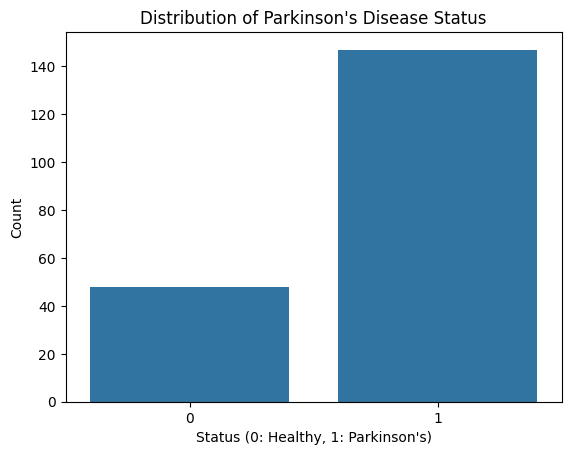

In [12]:
sns.countplot(x='status', data=data)
plt.title('Distribution of Parkinson\'s Disease Status')
plt.xlabel('Status (0: Healthy, 1: Parkinson\'s)')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

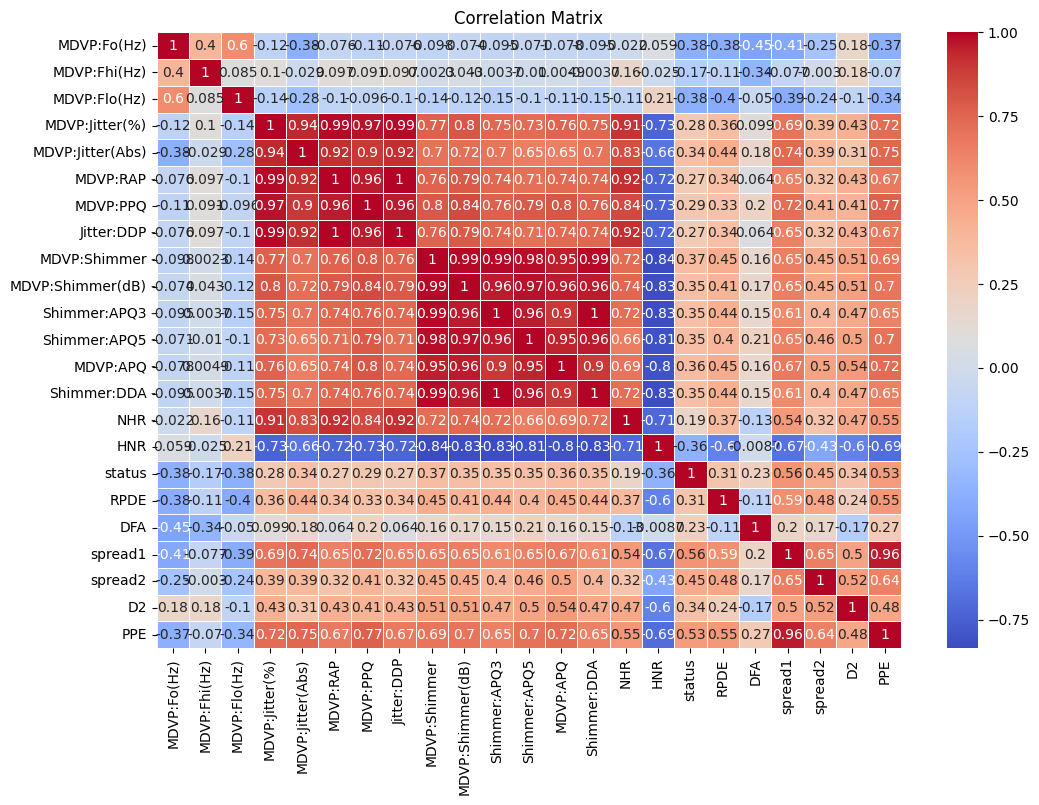

In [13]:
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')

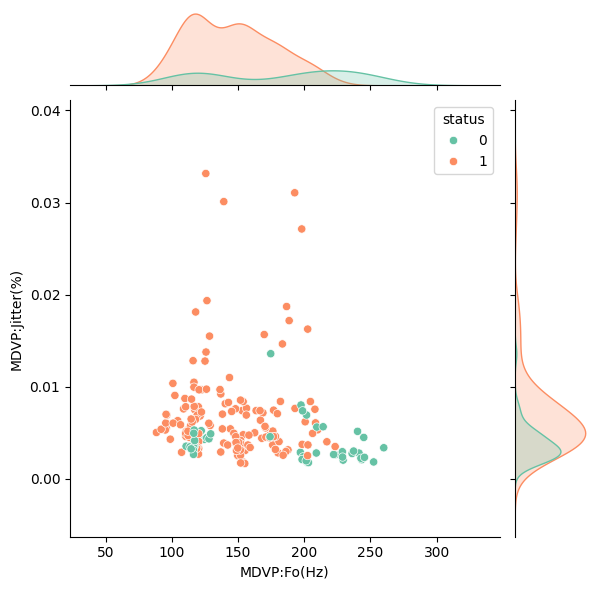

In [14]:
sns.jointplot(x='MDVP:Fo(Hz)', y='MDVP:Jitter(%)', data=data, hue='status', palette="Set2", kind='scatter')
plt.show()